In [2]:
import numpy as np
import scipy
import scipy.spatial
from scipy.spatial import distance_matrix

In [81]:
scattersEachGroup = 20

a1_x = np.random.uniform(9,12,scattersEachGroup)
a1_y = np.random.uniform(3,11,scattersEachGroup)
a2_x = np.random.uniform(1,6,scattersEachGroup)
a2_y = np.random.uniform(0,10,scattersEachGroup)
a3_x = np.random.uniform(5,9,scattersEachGroup)
a3_y = np.random.uniform(8,18,scattersEachGroup)

r4_x = np.random.uniform(0,12,scattersEachGroup)
r4_y = np.random.uniform(0,18,scattersEachGroup)

a_x = np.r_[a1_x, a2_x, a3_x, r4_x].reshape(-1,1)
a_y = np.r_[a1_y, a2_y, a3_y, r4_y].reshape(-1,1)

points = np.hstack((a_x, a_y))

In [101]:
scatters = scattersEachGroup * 4

indexes = np.arange(scatters)
np.random.shuffle(indexes)
indexes = indexes[:3]

distances = scipy.spatial.distance_matrix(points, points)

In [88]:
for i in indexes:
    print(i)
    print(points[i])
    print(distances[i][i])
    print(distances[i])

18
[ 9.35227749  9.44681929]
0.0
[  0.82945613   1.46795803   1.70120864   1.50530165   1.14597645
   1.057177     2.49525637   0.7245308    3.26310315   5.72250478
   5.7931956    1.56118678   4.95419514   3.23994966   3.66348905
   0.92805768   6.17382058   1.38898473   0.           2.09166352
   6.10692008   8.43168243   8.95567035   8.94533407  10.24567423
  10.32642292  11.50984392   5.81160404  10.95786236   6.67033056
   7.2867029    8.13608926   5.02855546   6.11967441   5.71895244
   8.94198768   4.45931776   6.7367855    4.38353762  10.06622287
   6.23694139   4.65709052   4.11204767   6.31791233   2.13907967
   7.41163774   3.65229239   6.91921993   4.8662845    4.85017657
   0.5017107    4.28535329   6.1122316    7.81596353   6.4471698
   5.34135719   4.21422654   8.08675785   8.50333523   3.98282129
   3.23174908   7.30335603   7.09760143   7.50640834   6.51959285
   1.63472811   0.83019755   6.38640022   1.91351997   6.66495021
   2.31848966   5.16449297   9.2293153    6.

In [118]:
group_a = np.array([])
group_b = np.array([])
group_c = np.array([])

for i in range(scatters):
    if ((distances[indexes[0]][i] < distances[indexes[1]][i]) and (distances[indexes[0]][i] < distances[indexes[2]][i])):
        group_a = np.append(group_a, points[i])
    if ((distances[indexes[1]][i] < distances[indexes[0]][i]) and (distances[indexes[1]][i] < distances[indexes[2]][i])):
        group_b = np.append(group_b, points[i])
    if ((distances[indexes[2]][i] < distances[indexes[0]][i]) and (distances[indexes[2]][i] < distances[indexes[1]][i])):
        group_c = np.append(group_c, points[i])

In [122]:
group_a = group_a.reshape(-1, 2)
group_b = group_b.reshape(-1, 2)
group_c = group_c.reshape(-1, 2)

print(group_a)
print(group_a.mean(0))
print("")

print(group_b)
print(group_b.mean(0))
print("")

print(group_c)
print(group_c.mean(0))
print("")

[[  9.6024097    8.65597712]
 [  9.93941351   7.85014083]
 [ 10.21588341   8.21388868]
 [ 10.47414285   9.68065711]
 [  9.33826651   8.38973514]
 [ 11.46171662  10.77969998]
 [  9.37025907   8.72251166]
 [ 10.05950861   6.2612791 ]
 [ 10.94782397   3.95124904]
 [  9.12474864   3.65809353]
 [ 10.78213691  10.07356183]
 [ 11.12809754   4.82183143]
 [  9.81986239   6.24078777]
 [ 10.76529546   6.06679974]
 [ 10.10313808   9.99225437]
 [ 10.55696804   3.39167426]
 [ 10.68303372   9.04886649]
 [  9.35227749   9.44681929]
 [ 10.96471192  10.77915239]
 [  8.36508755   6.36953832]
 [  9.06187374   1.94603054]
 [ 10.27135269   8.09491812]
 [  9.54301932   8.63883073]
 [ 11.65438899   9.72191376]
 [ 11.69889407  14.04740385]]
[ 10.21137243   7.7937446 ]

[[  9.26564861  10.91221897]
 [  2.90105147   7.75123899]
 [  5.85124944   6.6848784 ]
 [  2.89212865   7.53612415]
 [  4.97087926   9.30988267]
 [  7.2878826   15.33220047]
 [  6.72409467  13.29144504]
 [  8.47719293  13.46467482]
 [  8.0211280

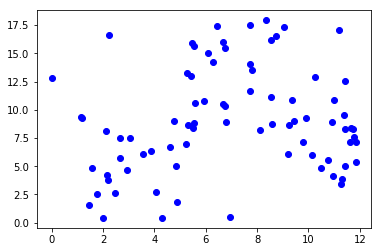

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(a_x, a_y, 'bo')
plt.show()

# a1_x, a1_y

# TO JEST HEADER

In [20]:
0